In [1]:
import sys
from pathlib import Path

# Add project root to Python path
project_root = Path().resolve().parent
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

In [2]:
from data.data import create_dataloader_stage_2
# from diffusers.models import AutoencoderKL
# import torch

dl = create_dataloader_stage_2('/home/chojnowski.h/weishao/chojnowski.h/JaxFM/common_canvas_0.array_record', 0, 1, 0)
# vae = AutoencoderKL.from_pretrained(
#     "stabilityai/stable-diffusion-3-medium-diffusers",
#     subfolder="vae",
#     torch_dtype=torch.bfloat16,
# ).to(device="cuda")

In [3]:
i = 0
goal = 0

for batch in dl:
    if i == goal:
        break
    i += 1

# mean = torch.tensor(batch['latent'], dtype=torch.int16).view(torch.bfloat16).to(device='cuda')
short_caption = batch['short_caption']
long_caption = batch['long_caption']

In [4]:
print(short_caption)
print(long_caption)

['a large topiary shaped like a letter m']
["The image features a close-up of a large, meticulously trimmed topiary in the shape of a stylized letter 'M'. The topiary is composed of dense, vibrant green foliage, with two symmetrical, curved arms forming the letter's structure. It is situated in a landscaped garden bed, surrounded by a low, concrete curb and a collection of smooth, light-colored stones. To the left of the topiary, a tall, black lamppost stands, its pole extending vertically into the frame. The background reveals a paved road with a white line, bordered by a chain-link fence and a few trees. The scene is illuminated by bright, natural daylight, casting soft shadows and highlighting the lush greenery. The overall atmosphere is one of a well-maintained, outdoor public space, possibly a park or a roadside area."]


['The image features a close-up of a large, ornate stone building with a prominent clock tower under a clear blue sky. The building has a classical architectural style with a large dome, a clock face, and a flagpole flying an American flag at the top of the dome. The structure is made of light-colored stone and has a symmetrical facade with multiple windows and columns. The clock face is visible on the front of the building, and there are two flags flying on the tower. The building is surrounded by palm trees and other greenery, suggesting a warm, possibly tropical location. The sky is a vibrant blue with no clouds, indicating a sunny day. The overall scene is bright and clear, with the building standing out prominently against the sky.']


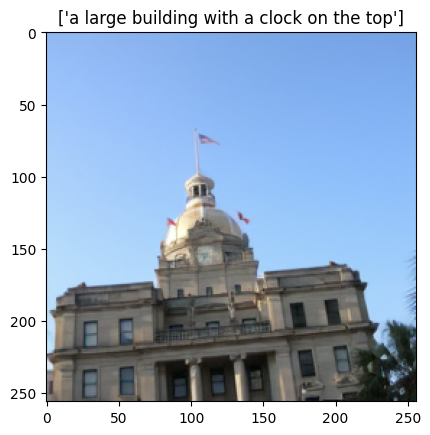

In [22]:
out = vae.decode(mean)[0]

import matplotlib.pyplot as plt

out = out.squeeze(0).detach().float().cpu().permute(1,2,0).clip(0,1).numpy()

plt.imshow(out)
plt.title(short_caption)
print(long_caption)